# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog, ORB, plot_matches
from skimage import data, color, exposure
import cv2
from sklearn.cluster import KMeans
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as mpimg
import math
import cv2
import gdown
import shutil
import os
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import StandardScaler

# Load Data

In [ ]:
def download_from_google_drive_url(url, file):
    if not os.path.isdir("ICE 05 Pictures/"):
        gdown.download_folder("https://drive.google.com/drive/folders/1x2peGpYhQO8hx3L3m6fJHOCZWSmzsReJ?usp=sharing", quiet=False, use_cookies=False)
    if os.path.exists("ICE 05 Pictures/" + file):
        shutil.move("ICE 05 Pictures/" + file, file)

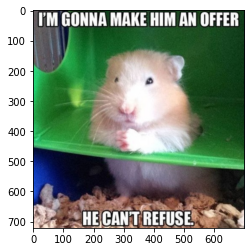

In [ ]:
# Task 3
image_links = [
    "https://media.istockphoto.com/photos/cute-syrian-hamster-working-on-the-computer-picture-id1354756711?k=20&m=1354756711&s=612x612&w=0&h=AQCLF7TzW7UZJTJ_o6DEK2cx0te0F2NygyfSSXryaWc=", 
    "https://i.chzbgr.com/full/9102969088/hAB74EFD4/hamster-shhhh-iam-a-egg", 
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSs35h--nMMVkNfv3Q9JYOUxDR6xHMfAdD9Og&usqp=CAU", 
    "https://s.yimg.com/ny/api/res/1.2/6iO9N8ke7oP1Ivlo54Djrg--/YXBwaWQ9aGlnaGxhbmRlcjt3PTQyMDtoPTI4MA--/https://s.yimg.com/uu/api/res/1.2/o07KTkz24kQzS3AzlaXnWw--~B/aD0yMDA7dz0zMDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/globenewswire.com/65b3abb9dfffb1b5788d857a0ab0674c", 
    "https://thumbs.dreamstime.com/b/cute-funny-hamster-sitting-ice-cream-cone-227420412.jpg", 
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXsNGLm3h4h6uEZuSctOlpW6AuSj2yHmG05Q&usqp=CAU", 
    "https://slapwank.com/wp-content/uploads/2017/03/Funny-hamster-memes-1.png", 
    "https://www.letseatcake.com/wp-content/uploads/2020/11/Hamster-Memes-17.jpg", 
    "https://i.ytimg.com/vi/X1kcTdzKb_E/hqdefault.jpg", 
    "https://www.letseatcake.com/wp-content/uploads/2020/11/Hamster-Memes-10.jpg"
]

images_10 = []
for url in image_links:
    response = requests.get(url)
    images_10.append(Image.open(BytesIO(response.content)))
plt.imshow(images_10[-1])

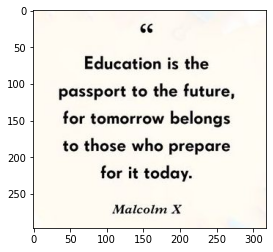

In [ ]:
# Task 4
download_from_google_drive_url("https://drive.google.com/file/d/1Xp-RWbkpvcGk1u6bu6aDhRhM3KDrsL9J/view?usp=sharing", "ExtractText4.jpeg")
image_4 = Image.open("ExtractText4.jpeg")
plt.imshow(image_4)

In [ ]:
img_train = download_from_google_drive_url("https://drive.google.com/file/d/1MBOdxDC9f3rsdx5xGA6RlwdG_xL03uFH/view?usp=sharing", "bush_2.jpeg")
img_test = download_from_google_drive_url("https://drive.google.com/file/d/12XDwfH0CvOfWc8vGEHpcwwQkEkrUWuMa/view?usp=sharing", "christmas_2.jpeg")
img_train = cv2.imread("bush_2.jpeg")
img_test = cv2.imread("christmas_2.jpeg")

In [ ]:
# shutil.rmtree("ICE 05 Pictures/")

# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [ ]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [ ]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [ ]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

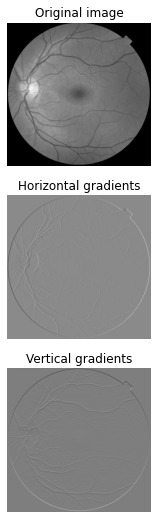

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

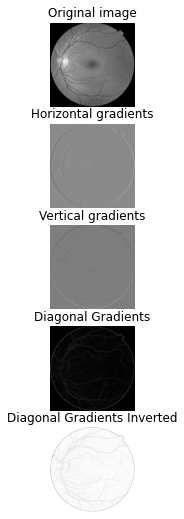

In [ ]:
def diag_gradient(gx, gy):
    sgx = gx**2
    sgy = gy**2
    gd = np.add(sgx, sgy)
    gd = np.sqrt(gd)
    return gd

gd = diag_gradient(gx, gy)
f = lambda x : 1 - x
gd_flip = list(map(f, gd))
gd_flip

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(5, 9), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

ax4.axis("off")
ax4.imshow(gd, cmap=plt.cm.gray)
ax4.set_title("Diagonal Gradients")
ax4.set_adjustable("box")

ax5.axis("off")
ax5.imshow(gd_flip, cmap=plt.cm.gray)
ax5.set_title("Diagonal Gradients Inverted")
ax5.set_adjustable("box")

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: Because many of the things we look for in an image don't depend on simple features. For example, an edge can occur in combination of every color in the rainbow, and does not depend at all on the number of pixels. Additionally, with the exception of some machine learning algorithms, the algorithms used to work with images cannot pick up on these higher level features for themselves, so the high level features must be calculated/created and given to the algorithm directly.


---

## (Tutorial) HOG image features

In [ ]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

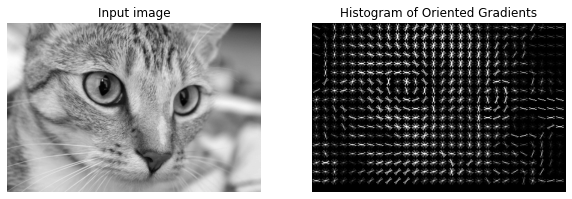

In [ ]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

(300, 451)
266.11199999999997 354.7348991999999
451.0 300.0


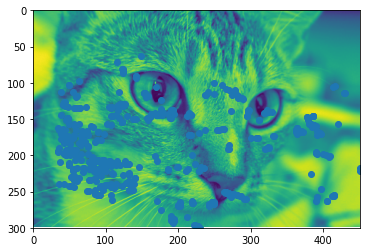

In [ ]:
# Get image
image = color.rgb2gray(data.chelsea())

# ORB
orb_extractor = ORB()
orb_extractor.detect_and_extract(image)
keypoints = orb_extractor.keypoints
descriptors = orb_extractor.descriptors

# Split keypoints
kx = []
ky = []
for row in keypoints:
    kx.append(row[0])
    ky.append(row[1])
print(image.shape)

# Rescale keypoints
x_max = max(kx)
y_max = max(ky)
print(x_max, y_max)
for i in range(len(kx)):
    kx[i] = (kx[i] * image.shape[1]) / x_max
    ky[i] = (ky[i] * image.shape[0]) / y_max
print(max(kx), max(ky))

# Plot
plt.imshow(image)
plt.scatter(kx, ky)
plt.xlim([0, image.shape[1]])
plt.ylim([image.shape[0], 0])
plt.show()

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [ ]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [ ]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [ ]:
# Clustring the bag-of-visual-words by Kmeans method
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

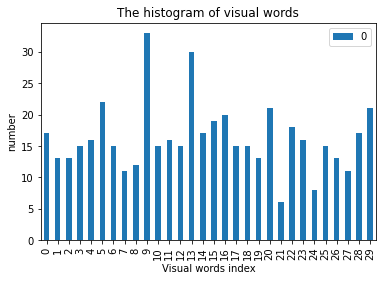

In [ ]:
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

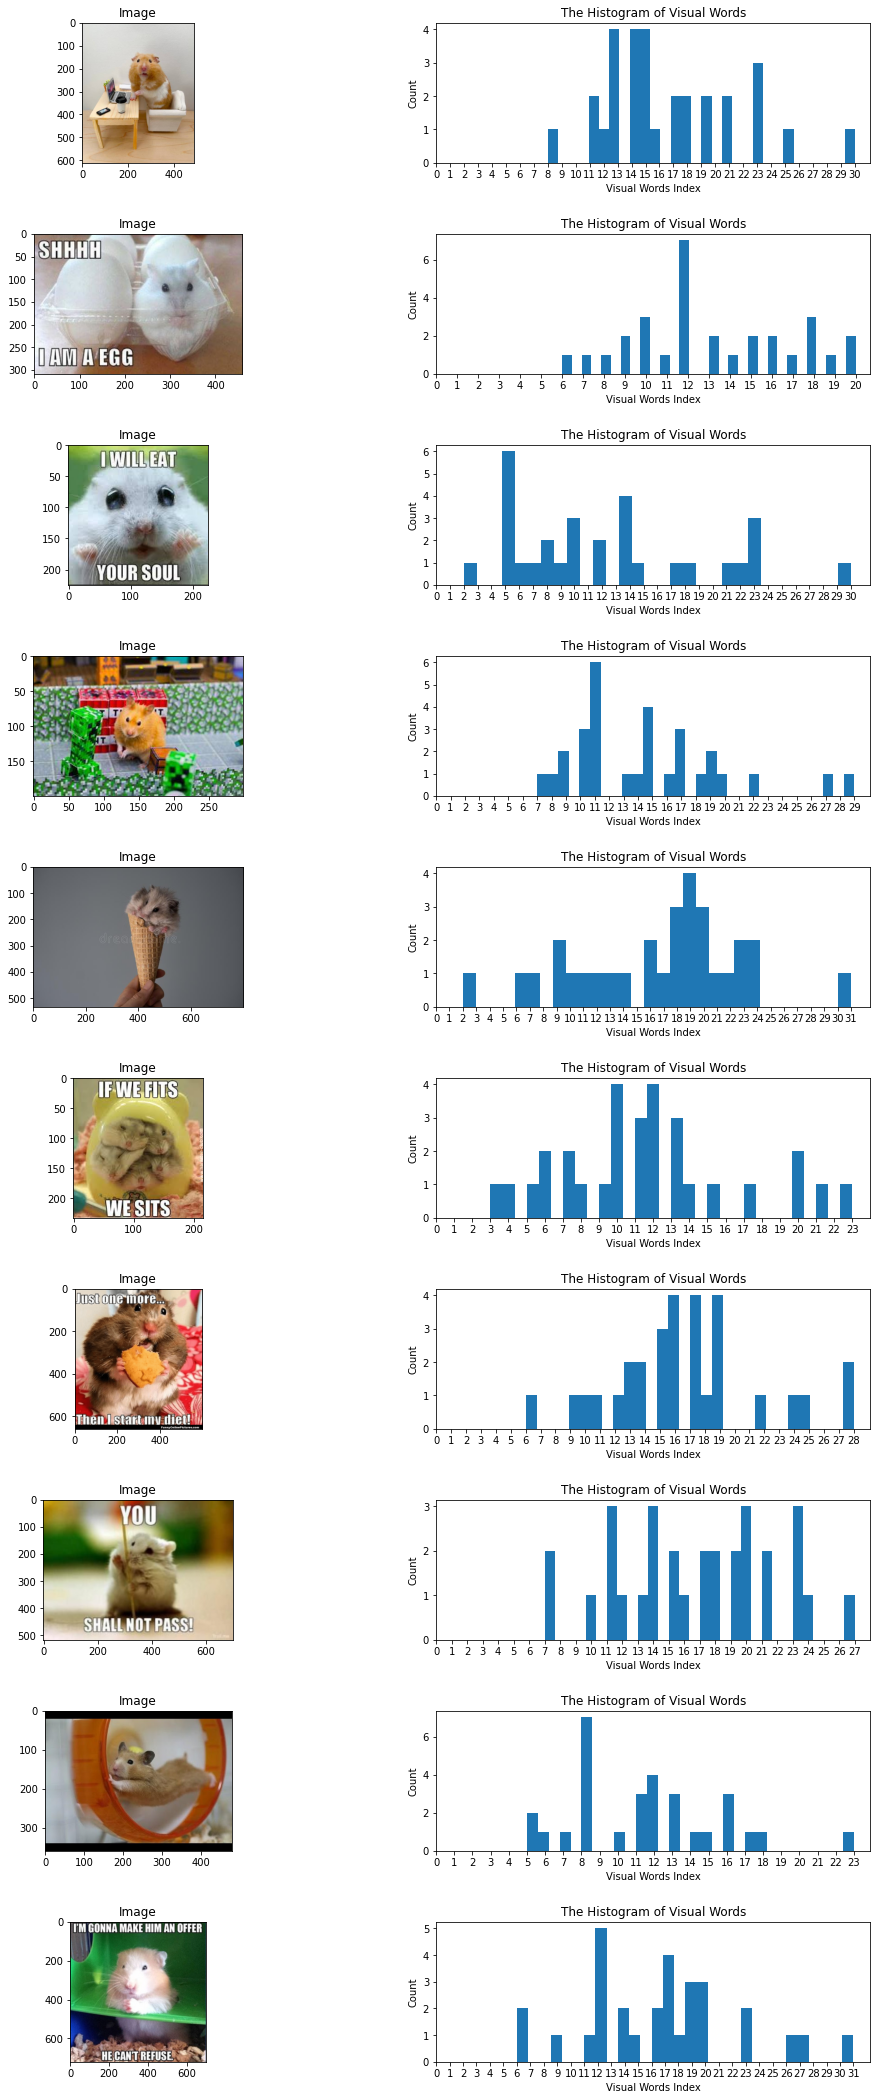

In [ ]:
# Setup
preprocessed_images = []
k = 30
for image in images_10:

    # Get features of each image
    keypoint, descriptor = features(np.array(image))
    if (descriptor is not None):

        # Cluster and get histograms
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(descriptor)
        histogram = build_histogram(descriptor, kmeans)
        preprocessed_images.append(histogram)

# Display
fig, axs = plt.subplots(10, 2, sharex=False, sharey=False, figsize=(15, 30))
fig.tight_layout(pad=5.0)
for i, image in enumerate(images_10):

    # Image
    axs[i, 0].imshow(image)
    axs[i, 0].set_title("Image")

    # Histogram
    axs[i, 1].hist(preprocessed_images[i], bins=k)
    axs[i, 1].set_xlabel('Visual Words Index')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_title('The Histogram of Visual Words')
    axs[i, 1].set_xticks(list(range(math.ceil(np.max(preprocessed_images[i]))+1)))

plt.show()

for i in range(len(images_10)-1):
    images_10[i].close()

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: Feature scaling will not have an effect on the outcome of a bag-of-visual-words. Because a KNN calculates the distance between values and clusters based off of that, it doesn't matter what the range of the values is or how it changes so long as the ratios between the values remains the same. It matters that a value is 1 or 100 far less than the fact that a value is 75% of the value of another value.

---

In [ ]:
# Setup
preprocessed_images = []
k = 30

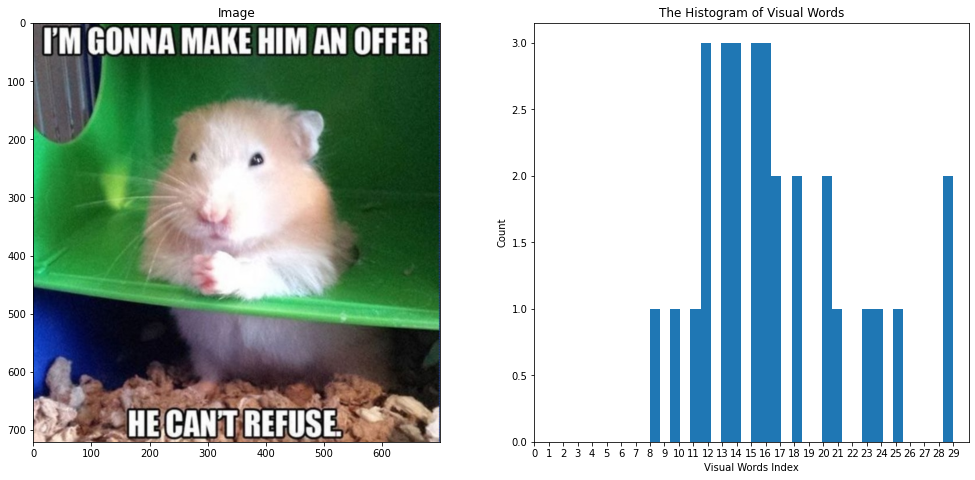

In [ ]:
# First in Comparison

# Get features
keypoint, descriptor = features(np.array(images_10[-1]))
if (descriptor is not None):

    # Cluster and get histograms
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(descriptor)
    histogram = build_histogram(descriptor, kmeans)
    preprocessed_images.append(histogram)

# Display
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 7.5))
fig.tight_layout(pad=5.0)

# Image
axs[0].imshow(images_10[-1])
axs[0].set_title("Image")

# Histogram
axs[1].hist(preprocessed_images[0], bins=k)
axs[1].set_xlabel('Visual Words Index')
axs[1].set_ylabel('Count')
axs[1].set_title('The Histogram of Visual Words')
axs[1].set_xticks(list(range(math.ceil(np.max(preprocessed_images[0]))+1)))

plt.show()

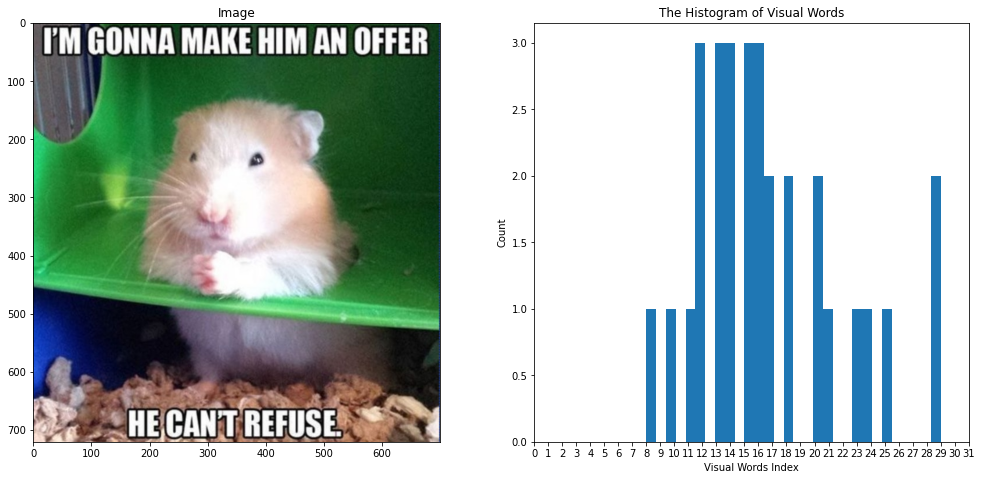

In [ ]:
# Second in Comparison

# Get features
keypoint, descriptor = features(np.array(images_10[-1]))
if (descriptor is not None):

    # Cluster and get histograms
    kmeans = KMeans(n_clusters=k)
    scaler = StandardScaler()
    scaler.fit(descriptor)
    descriptor = scaler.transform(descriptor)
    kmeans.fit(descriptor)
    histogram = build_histogram(descriptor, kmeans)
    preprocessed_images.append(histogram)

# Display
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 7.5))
fig.tight_layout(pad=5.0)

# Image
axs[0].imshow(images_10[-1])
axs[0].set_title("Image")

# Histogram
axs[1].hist(preprocessed_images[0], bins=k)
axs[1].set_xlabel('Visual Words Index')
axs[1].set_ylabel('Count')
axs[1].set_title('The Histogram of Visual Words')
axs[1].set_xticks(list(range(math.ceil(np.max(preprocessed_images[1]))+1)))

plt.show()

In [ ]:
images_10[-1].close()

## Question 3. What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

**Answer to Q3**: ORB does better on feature detection and is a much faster algorithm to run. As shown in this article (https://computer-vision-talks.com/2011-07-13-comparison-of-the-opencv-feature-detection-algorithms/), ORB does a marginally better job of picking up keypoints in a feature, and is so much faster that it's barely even a comparison.

ORB performs as well as SIFT on the task of feature detection (and is
better than SURF) while being almost two orders of magnitude faster.


ORB’s main contributions are as follows:

• The addition of a fast and accurate orientation component to FAST
• The efficient computation of oriented BRIEF features
• Analysis of variance and correlation of oriented BRIEF features
• A learning method for decorrelating BRIEF features under rotational
invariance, leading to better performance in nearest-neighbor applications

## Task 4. Extract text from image
Image file is given along with ICE-5-2.ipynb in canvas assignment .

Save it in drive and use get shareable link to everyone option . Image file name is **ExtractText4.jpeg**

Please extract the image from image file and print the text that you extracted.

In [ ]:
try:
    import pytesseract
except:
    ! sudo apt install tesseract-ocr
    ! pip install pytesseract

import pytesseract

In [ ]:
# Get text
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"
text = pytesseract.image_to_string(image_4)

# Display
print(text)

image_4.close()

oe

Education is the
passport to the future,
for tomorrow belongs
to those who prepare

for it today.

Malcolm X



## Task 5. Design code to implement **ORB** using **OpenCV**. Please use a face image (Preferably your face image as its unique).

Keep your face image file name as **faceimg.jpg**
Save it in drive and use get shareable link to everyone option.

Please print the following during the implementation

* Training image and Testing image 

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



In [ ]:
# Convert to black and white
img_train_bw = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)
img_test_bw = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

# Get keypoints and descriptors
orb = cv2.ORB_create()
train_keypoints, train_descriptors = orb.detectAndCompute(img_train_bw, None)
test_keypoints, test_descriptors = orb.detectAndCompute(img_test_bw, None)

# Find matches
matcher = cv2.BFMatcher()
matches = matcher.match(test_descriptors, train_descriptors)
good_matches = []
distance_max = max([m.distance for m in matches])
for m in matches:
    if m.distance < 0.75 * distance_max:
        good_matches.append(m)

# View keypoints count
print("Number of Training Keypoints:", len(train_keypoints))
print("Number of Testing Keypoints:", len(test_keypoints))
print("Number of Matching Keypoints:", len(matches))
print("Number of Good Matching Keypoints:", len(good_matches))

Number of Training Keypoints: 500
Number of Testing Keypoints: 500
Number of Matching Keypoints: 500
Number of Good Matching Keypoints: 312


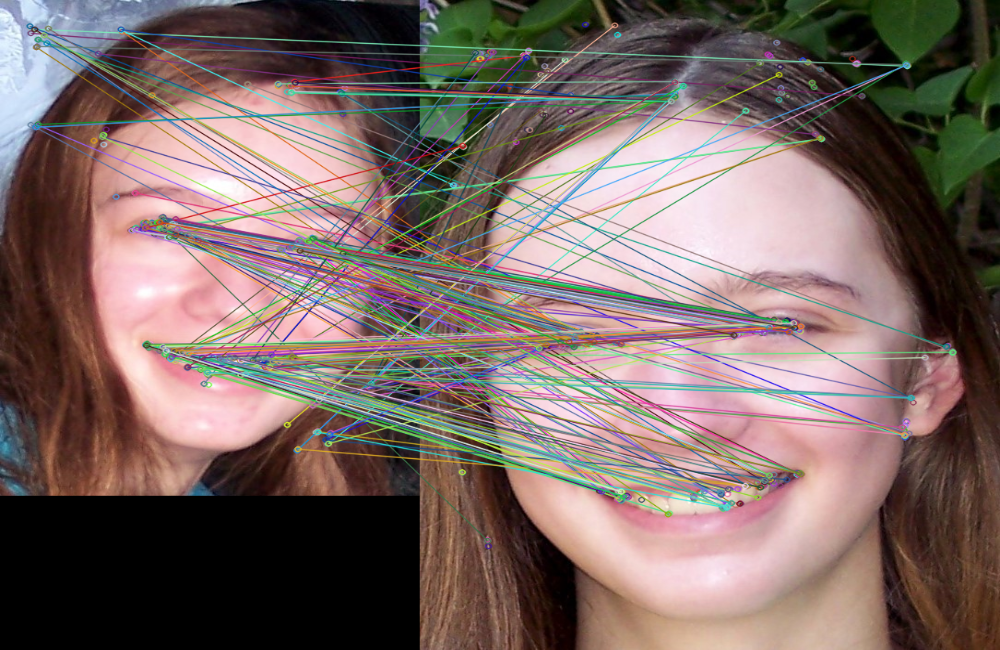

In [ ]:
final_img = cv2.drawMatches(img_test, test_keypoints, img_train, train_keypoints, matches[:len(good_matches)], None)
final_img = cv2.resize(final_img, (1000, 650))
 
# Show the final image
cv2_imshow(final_img)